<a href="https://colab.research.google.com/github/jasonhua805/UltimateIncDSChallenge/blob/main/Part_1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Reading in the Login File
import pandas as pd
df = pd.read_json('logins.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#Add in a column that counts the instances of each login time and then reset the index to login time so that we can work with a datetime index
df['count'] = df.groupby('login_time')['login_time'].transform('count')
df.set_index('login_time',inplace=True)

In [5]:
#Now we can aggregate to 15 minute intervals like the problem asks
df_agg = df.groupby(pd.Grouper(freq='15Min')).count()
df_agg

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [6]:
df_agg

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


It would be best to find underlying patterns in the data in more ways than just the direct datetime we're provided here. Let's expand on this by separating the time from the index and also adding in "Day of the Week", "Month", and "Year" columns

In [7]:
df_agg['Time'] = df_agg.index.time
df_agg['DoW'] = df_agg.index.dayofweek
df_agg['Month'] = df_agg.index.month
df_agg

,count,Time,DoW,Month
login_time,,,,
1970-01-01 20:00:00,2,20:00:00,3,1
1970-01-01 20:15:00,6,20:15:00,3,1
1970-01-01 20:30:00,9,20:30:00,3,1
1970-01-01 20:45:00,7,20:45:00,3,1
1970-01-01 21:00:00,1,21:00:00,3,1
...,...,...,...,...
1970-04-13 17:45:00,5,17:45:00,0,4
1970-04-13 18:00:00,5,18:00:00,0,4
1970-04-13 18:15:00,2,18:15:00,0,4


In [8]:
#Data aggregated by time of day
df_time = df_agg.groupby('Time')['count'].sum()

#Data aggregated by day of week
df_dow = df_agg.groupby('DoW')['count'].sum()

#Data aggregated by month
df_month = df_agg.groupby('Month')['count'].sum()

In [9]:
#Normalizing the time column so that we can plot it properly on seaborn
import datetime
df_time2 = df_time.reset_index()
df_time2
normalized_time = []
for time in df_time2['Time']:
  time = datetime.datetime.combine(datetime.date(2000,1,1),time)
  normalized_time.append(time)
df_time2['Time'] = normalized_time
df_time2

,Time,count
0,2000-01-01 00:00:00,1439
1,2000-01-01 00:15:00,1547
2,2000-01-01 00:30:00,1525
3,2000-01-01 00:45:00,1482
4,2000-01-01 01:00:00,1549
...,...,...
91,2000-01-01 22:45:00,1637
92,2000-01-01 23:00:00,1573
93,2000-01-01 23:15:00,1552
94,2000-01-01 23:30:00,1456


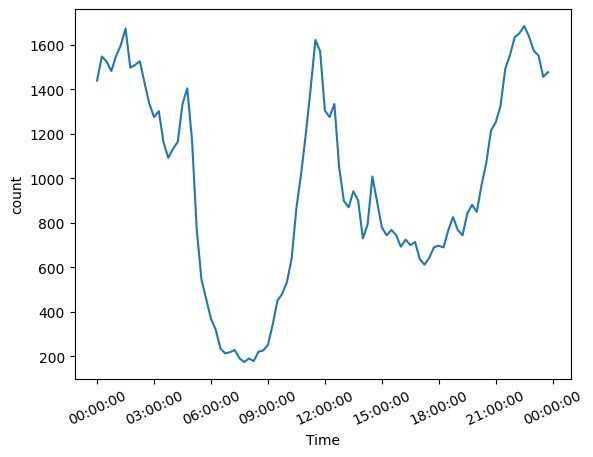

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
ax = sns.lineplot(x='Time',y='count',data=df_time2)
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=25)
plt.show();

Observations:
1. Peak login times are near 1:00 AM and 12:00 PM (Noon).
2. Logins drop sharply after 5:00 AM bottoming out around 8:00 AM before rapidly rising from 9:00 AM through 12:00 PM. There is a similar low period in the afternoon (i.e. 12:00 PM to 8:00 PM) before the logins start rising again from 9:00 PM to Midnight.

Conclusion: 
High Activity Periods: 10:00 PM to 5:00 AM and 11:00 AM to 1:00 PM
Low Activity Periods: 6:00 AM to 10:00 AM and 2:00 PM to 9:00 PM

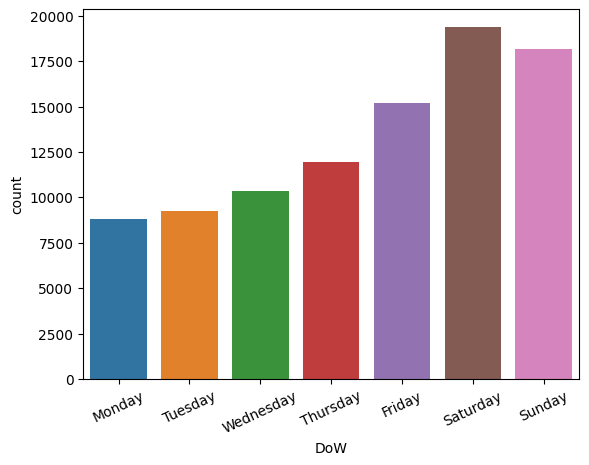

In [11]:
#Plot by Day of Week
df_dow = df_dow.reset_index()
ax = sns.barplot(x='DoW',y='count',data=df_dow)
ax.set_xticks(range(len(df_dow)),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=25)
plt.show();

Observations:
1. The weekend is the most popular time to login.
2. The login frequency gradually increases throughout the week before peaking on Saturday, declining slightly on Sunday, and then restarting at the lowest activity day on Monday.

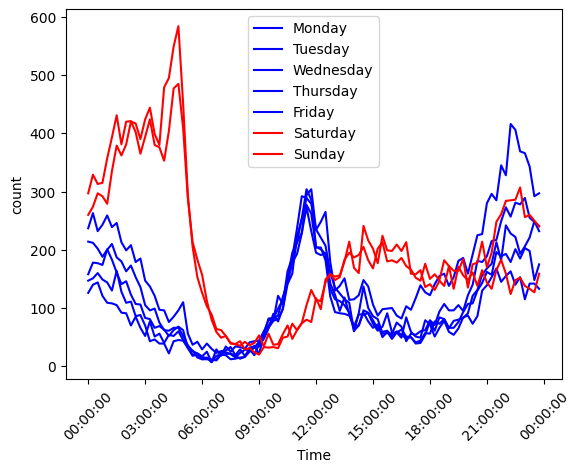

In [12]:
#Now let's observe these two features together
df_time_dow = df_agg.groupby(['DoW','Time'])['count'].sum().reset_index()

#Normalize Time column again to plot properly
normalized_time = []
for time in df_time_dow['Time']:
  time = datetime.datetime.combine(datetime.date(2000,1,1),time)
  normalized_time.append(time)
df_time_dow['Time'] = normalized_time

palette = ['blue','blue','blue','blue','blue','red','red']
ax = sns.lineplot(x='Time',y='count',data=df_time_dow,hue='DoW',palette=palette)
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
plt.xticks(rotation = 45)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show();

Observations:
1. The login trends differ on Weekends compared to Weekdays. The trend we observed earlier where logins sharply drop after 5:00 AM is mostly driven by this exact pattern occuring specifically on weekends. Weekday patterns have less variance than the weekends.
2. Logins steadily increase from Midnight to 5:00 AM on weekends but the reverse is true on weekdays.
3. The Weekday peak is ~12:00 PM (Noon) but this is not the case for Weekends which peak at 5:00 AM and then don't have nearly as much activity for the rest of the day but is relatively steady from 3:00 PM to 9:00 PM.
